<a href="https://colab.research.google.com/github/Pranav4860/ES114-PSDV/blob/main/Data_Narrative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
all_year_data=[]
for i in range(2000,2013):
  a=pd.read_excel(f'/content/drive/MyDrive/tylerudite-atp-match-data/atp_{i}.xls')
  all_year_data.append(a)
for i in range(2013,2025):
  a=pd.read_excel(f'/content/drive/MyDrive/tylerudite-atp-match-data/atp_{i}.xlsx')
  all_year_data.append(a)
players=pd.read_csv('/content/drive/MyDrive/tylerudite-atp-match-data/atp_players.csv')

In [ ]:
combined=pd.concat(all_year_data)
combined

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,UBW,UBL,LBW,LBL,SJW,SJL,MaxW,MaxL,AvgW,AvgL
0,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3.0,Dosedel S.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3.0,Enqvist T.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3.0,Escude N.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3.0,Federer R.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3.0,Fromberg R.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,24,Monte Carlo,Monte Carlo Masters,2024-04-12,Masters 1000,Outdoor,Clay,Quarterfinals,3.0,Djokovic N.,...,NaN,NaN,NaN,NaN,NaN,NaN,1.29,4.34,1.24,4.04
928,24,Monte Carlo,Monte Carlo Masters,2024-04-12,Masters 1000,Outdoor,Clay,Quarterfinals,3.0,Ruud C.,...,NaN,NaN,NaN,NaN,NaN,NaN,1.33,3.64,1.31,3.43
929,24,Monte Carlo,Monte Carlo Masters,2024-04-13,Masters 1000,Outdoor,Clay,Semifinals,3.0,Tsitsipas S.,...,NaN,NaN,NaN,NaN,NaN,NaN,3.99,1.31,3.62,1.28
930,24,Monte Carlo,Monte Carlo Masters,2024-04-13,Masters 1000,Outdoor,Clay,Semifinals,3.0,Ruud C.,...,NaN,NaN,NaN,NaN,NaN,NaN,3.19,1.44,2.90,1.41


In [ ]:
combined.columns

Index(['ATP', 'Location', 'Tournament', 'Date', 'Series', 'Court', 'Surface',
       'Round', 'Best of', 'Winner', 'Loser', 'WRank', 'LRank', 'W1', 'L1',
       'W2', 'L2', 'W3', 'L3', 'W4', 'L4', 'W5', 'L5', 'Wsets', 'Lsets',
       'Comment', 'CBW', 'CBL', 'GBW', 'GBL', 'IWW', 'IWL', 'SBW', 'SBL',
       'B365W', 'B365L', 'B&WW', 'B&WL', 'EXW', 'EXL', 'PSW', 'PSL', 'WPts',
       'LPts', 'UBW', 'UBL', 'LBW', 'LBL', 'SJW', 'SJL', 'MaxW', 'MaxL',
       'AvgW', 'AvgL'],
      dtype='object')

# Q1: Correlation between winner and loser rank each year.

In [ ]:
corr_coeff=[]
for i in all_year_data:
  i['WRank'] = pd.to_numeric(i['WRank'], errors='coerce')
  i['LRank'] = pd.to_numeric(i['LRank'], errors='coerce')
  i.dropna(subset=['WRank', 'LRank'], inplace=True)
  cc=i['WRank'].corr(i['LRank'])
  corr_coeff.append(cc)
corr_df=pd.DataFrame({'Year':range(2000,2025),'Correlation Coefficent':corr_coeff})
corr_df

,Year,Correlation Coefficent
0,2000,0.091717
1,2001,0.121879
2,2002,0.071683
3,2003,0.160167
4,2004,0.090676
5,2005,0.117827
6,2006,0.095926
7,2007,0.140401
8,2008,0.153846
9,2009,0.066534


# Q2: Number of tournaments held each year

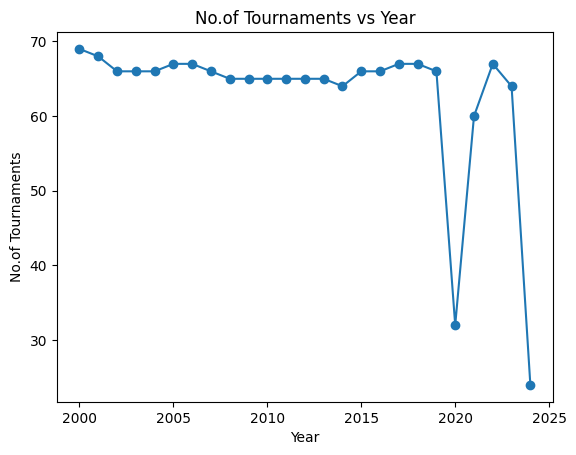

In [ ]:
nt=[]
for i in all_year_data:
  uni_tournaments=i['Tournament'].unique()
  n=len(uni_tournaments)
  nt.append(n)
plt.plot(range(2000,2025),nt,marker='o')

plt.xlabel('Year')
plt.ylabel('No.of Tournaments')
plt.title('No.of Tournaments vs Year')
plt.show()

# Q3: Percentage of games played indoor and outdoor.

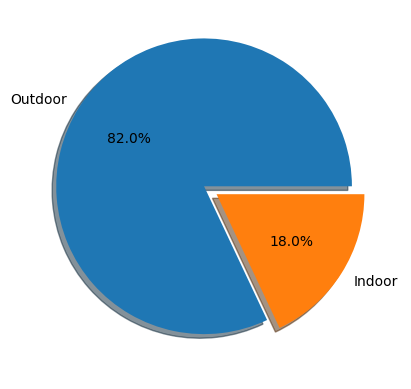

In [ ]:
court=combined['Court'].unique()
cn=[]
for i in court:
  d=combined[combined['Court']==i]
  n=len(d)
  cn.append(n)
plt.pie(cn,labels=court,autopct='%1.1f%%',explode=[0.1,0],shadow=True)
plt.show()

# Q4: Number of matches played in Adelaide every year.

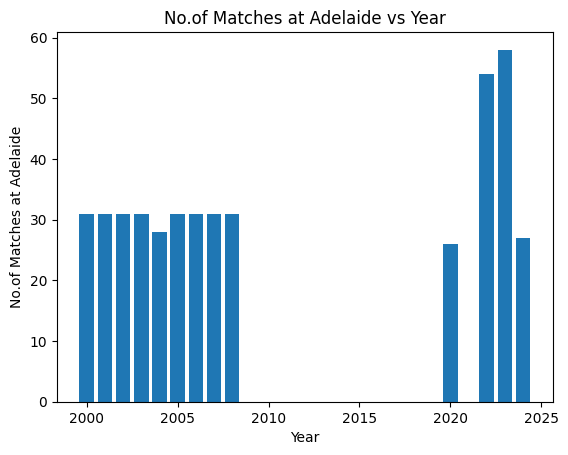

In [ ]:
ade_matches=[]
for i in all_year_data:
  d=i[i['Location']=='Adelaide']
  l=len(d)
  ade_matches.append(l)
plt.bar(range(2000,2025),ade_matches)

plt.xlabel('Year')
plt.ylabel('No.of Matches at Adelaide')
plt.title('No.of Matches at Adelaide vs Year')
plt.show()


# Q5: Total number of games played on each surface.



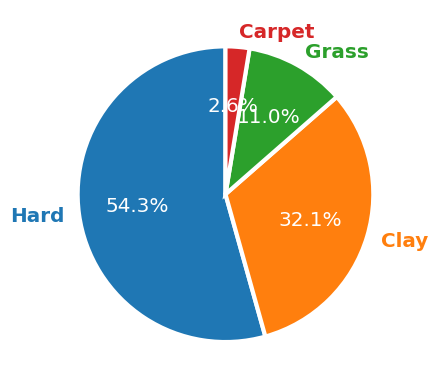

In [ ]:
surf=combined['Surface'].unique()
sn=[]
for i in surf:
  d=combined[combined['Surface']==i]
  n=len(d)
  sn.append(n)
patches, texts, pcts = plt.pie(sn,labels=surf, autopct='%.1f%%', wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'}, textprops={'size': 'x-large'}, startangle=90)

for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600)
plt.show()

# Q6: Win Percentage of Djokovic N. vs Nadal R. each year.



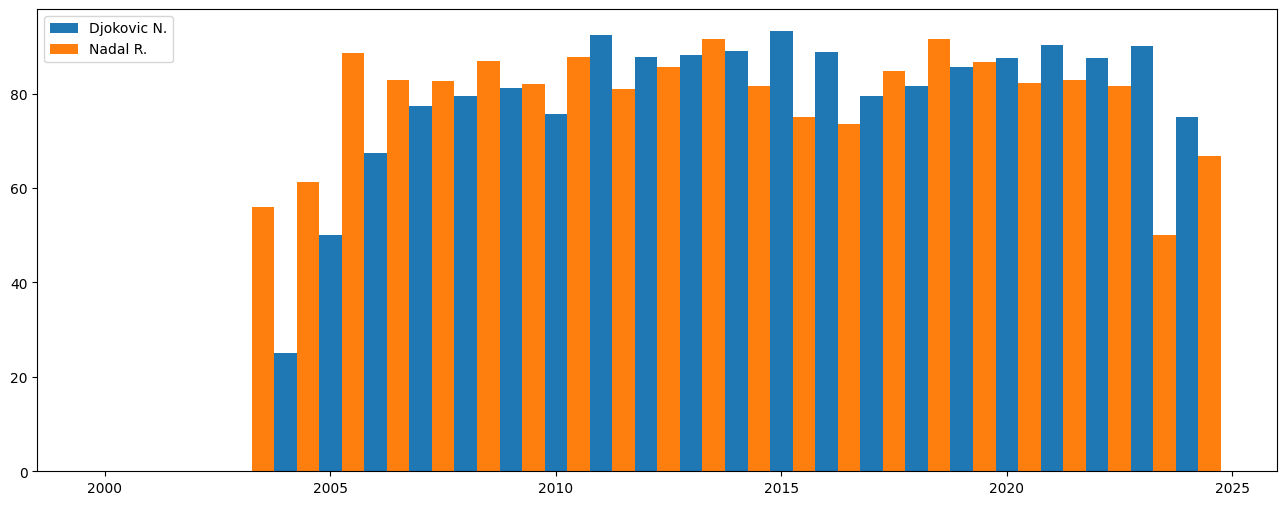

In [ ]:
pla=['Djokovic N.', 'Nadal R.']
wip=[]
for p in pla:
  win=[]
  for i in all_year_data:
    w=i[i['Winner']==p]
    mw=len(w)
    l=i[i['Loser']==p]
    ml=len(l)
    totm=mw+ml
    if totm==0:
      pw=0
    else:
      pw=(mw/totm)*100
    win.append(pw)
  wip.append(win)
plt.figure(figsize=(16, 6))
plt.bar(np.arange(2000,2025),wip[0],width=0.5)
plt.bar(np.arange(2000,2025)+0.5,wip[1],width=0.5)
plt.legend(pla)
plt.show()

# Q7: The player with most number of wins each year


In [ ]:
y=2000
for i in all_year_data:
  pl=i['Winner'].unique()
  max=0
  for j in pl:
    d=i[i['Winner']==j]
    n=len(d)
    if n>max:
      max=n
      name=j
  print('The Player with most wins in year',y, 'was:',name,'with',max,'wins')
  y+=1

The Player with most wins in year 2000 was: Safin M. with 69 wins
The Player with most wins in year 2001 was: Hewitt L. with 71 wins
The Player with most wins in year 2002 was: Hewitt L. with 61 wins
The Player with most wins in year 2003 was: Federer R. with 74 wins
The Player with most wins in year 2004 was: Federer R. with 70 wins
The Player with most wins in year 2005 was: Federer R. with 80 wins
The Player with most wins in year 2006 was: Federer R. with 90 wins
The Player with most wins in year 2007 was: Nadal R. with 71 wins
The Player with most wins in year 2008 was: Nadal R. with 73 wins
The Player with most wins in year 2009 was: Djokovic N. with 73 wins
The Player with most wins in year 2010 was: Nadal R. with 71 wins
The Player with most wins in year 2011 was: Djokovic N. with 72 wins
The Player with most wins in year 2012 was: Djokovic N. with 71 wins
The Player with most wins in year 2013 was: Nadal R. with 75 wins
The Player with most wins in year 2014 was: Federer R. wi

# Q8:  Who are the top 5 players with the highest win rates across all tournaments?

In [ ]:
wins = combined['Winner'].value_counts()
losses = combined['Loser'].value_counts()
totlm = wins.add(losses, fill_value=0)
wr =wins /totlm
t5 = wr.sort_values(ascending=False).head(10)
print(t5)

Murray A.          1.000000
Djokovic N.        0.839645
Federer R.         0.827634
Nadal R.           0.825739
Youzhny M.         0.800000
Tsitsipas S.       0.800000
Alcaraz C.         0.779904
Agassi A.          0.759207
Chiudinelli M.     0.750000
Stepanek R.        0.750000
Name: count, dtype: float64


## Q.9 How do the frequency distributions of points won by the winner in Round 1 in Adelaide, Brisbane compare to each other?

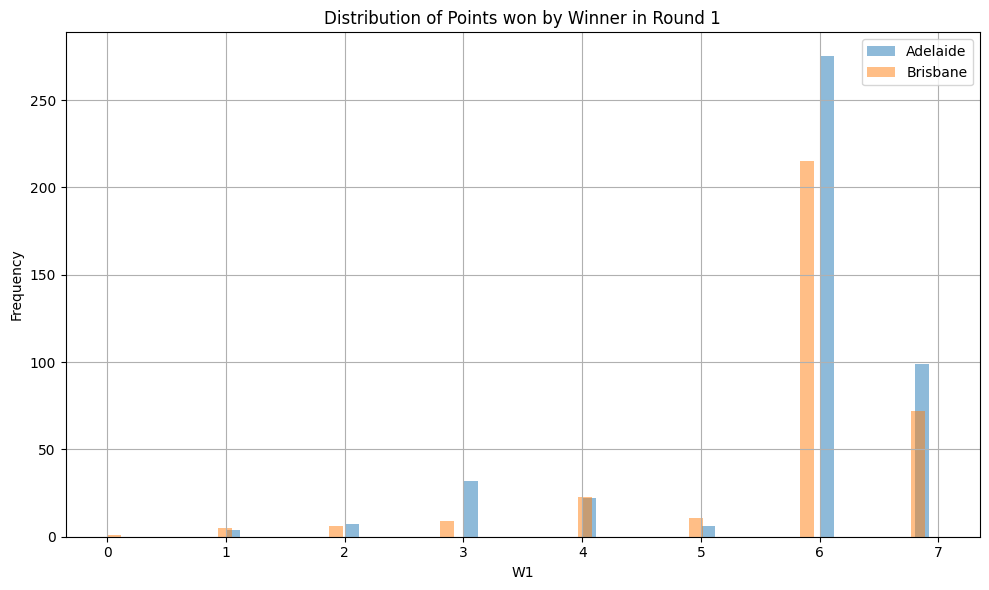

In [ ]:
l1 = combined[combined['Location'] == 'Adelaide']
l2 = combined[combined['Location'] == 'Brisbane']
plt.figure(figsize=(10, 6))
plt.hist(l1['W1'].dropna(), bins=30, alpha=0.5, label='Adelaide',width=0.12)
plt.hist(l2['W1'].dropna(), bins=30, alpha=0.5, label='Brisbane',width=0.12)
plt.xlabel('W1')
plt.ylabel('Frequency')
plt.title('Distribution of Points won by Winner in Round 1')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Q10: Win Percent of Nadal R. on each surface.

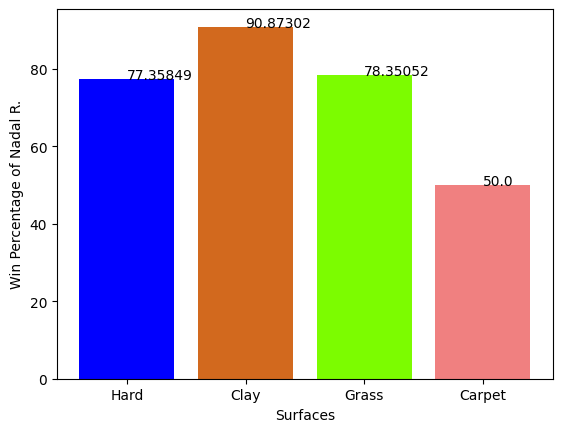

In [ ]:
wnr=combined[combined['Winner']=='Nadal R.']
lnr=combined[combined['Loser']=='Nadal R.']
surf=combined['Surface'].unique()
perc=[]
for i in surf:
  nw=len(wnr[wnr['Surface']==i])
  nl=len(lnr[lnr['Surface']==i])
  nt=nw+nl
  wper=(nw/nt)*100
  perc.append(wper)
clr=['b','chocolate','lawngreen','lightcoral']
plt.bar(surf,perc,color=clr)
for i in range(len(surf)):
  plt.text(i,round(perc[i],5),round(perc[i],5))
plt.xlabel('Surfaces')
plt.ylabel('Win Percentage of Nadal R.')
plt.show()

# Q11:What is the trend of number of matches across all years?

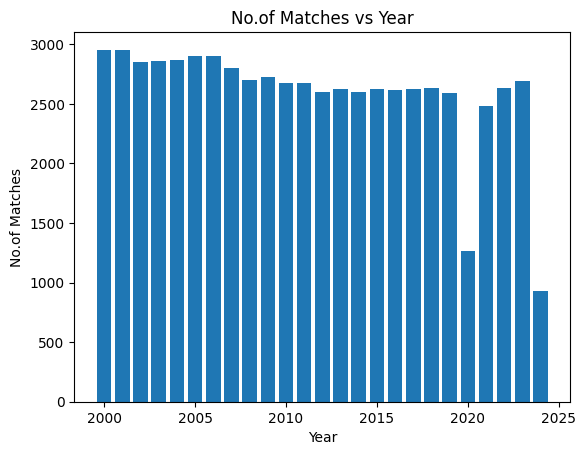

In [ ]:
n_matches=[]
for i in all_year_data:
  n=len(i)
  n_matches.append(n)
plt.bar(range(2000,2025),n_matches)

plt.xlabel('Year')
plt.ylabel('No.of Matches')
plt.title('No.of Matches vs Year')
plt.show()